 Diabetes and Digestive and Kidney Diseases using a simple ANN model

Import dataset using pandas library

In [1]:
import pandas as pd 

In [2]:
data =pd.read_csv("F:\A6_Datasets\diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
d1 = data.corr()
d1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


matplotlib , seaborn are the library for visualization of data here we are seaborn inbuild library.

In [9]:
import seaborn as sns

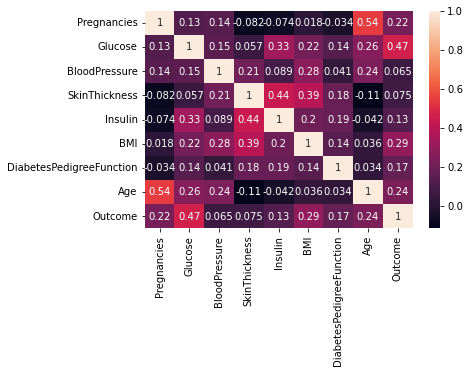

In [10]:
sns.heatmap(data = d1 , annot = True)
figure = figsize=(8,8)


heatmap will show the relationship between the features . 1 will show the strong relationship and 0 will show not related , 
- will show that features are inversly related to each other. 

<AxesSubplot:xlabel='Outcome', ylabel='count'>

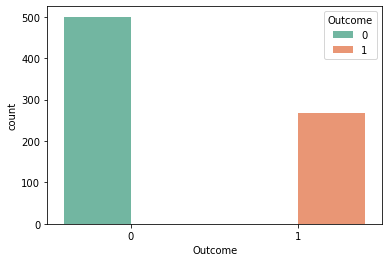

In [11]:
sns.countplot(x = data.Outcome , hue = "Outcome" , palette = "Set2",data =data)

from the above outcome we can say that the negative rate is less than the positive rate.

C:\Users\Anjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

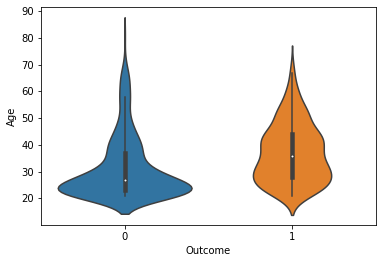

In [12]:
sns.violinplot(data.Outcome , data.Age, inner = "box")

violinplot will show the caparision as well as the data distribusion and the outliers also. 

C:\Users\Anjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

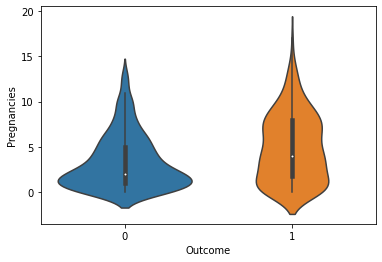

In [13]:
sns.violinplot(data.Outcome , data.Pregnancies, inner = "box")

C:\Users\Anjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Insulin'>

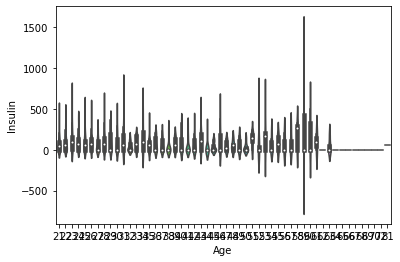

In [14]:
sns.violinplot(data.Age , data.Insulin, inner = "box")

In [15]:
column_names = data.columns
column_names = column_names.drop('Outcome')
for name in column_names:
    print('{}\n'.format(name))
    print(data.groupby(['Outcome'])[name].mean())
    print('*'*50)
    print()

Pregnancies

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
**************************************************

Glucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
**************************************************

BloodPressure

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
**************************************************

SkinThickness

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
**************************************************

Insulin

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64
**************************************************

BMI

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
**************************************************

DiabetesPedigreeFunction

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
**************************************************

Age

Outcome
0    31.190000
1    37.067

C:\Users\Anjali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anjali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anjali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='Age', ylabel='Density'>

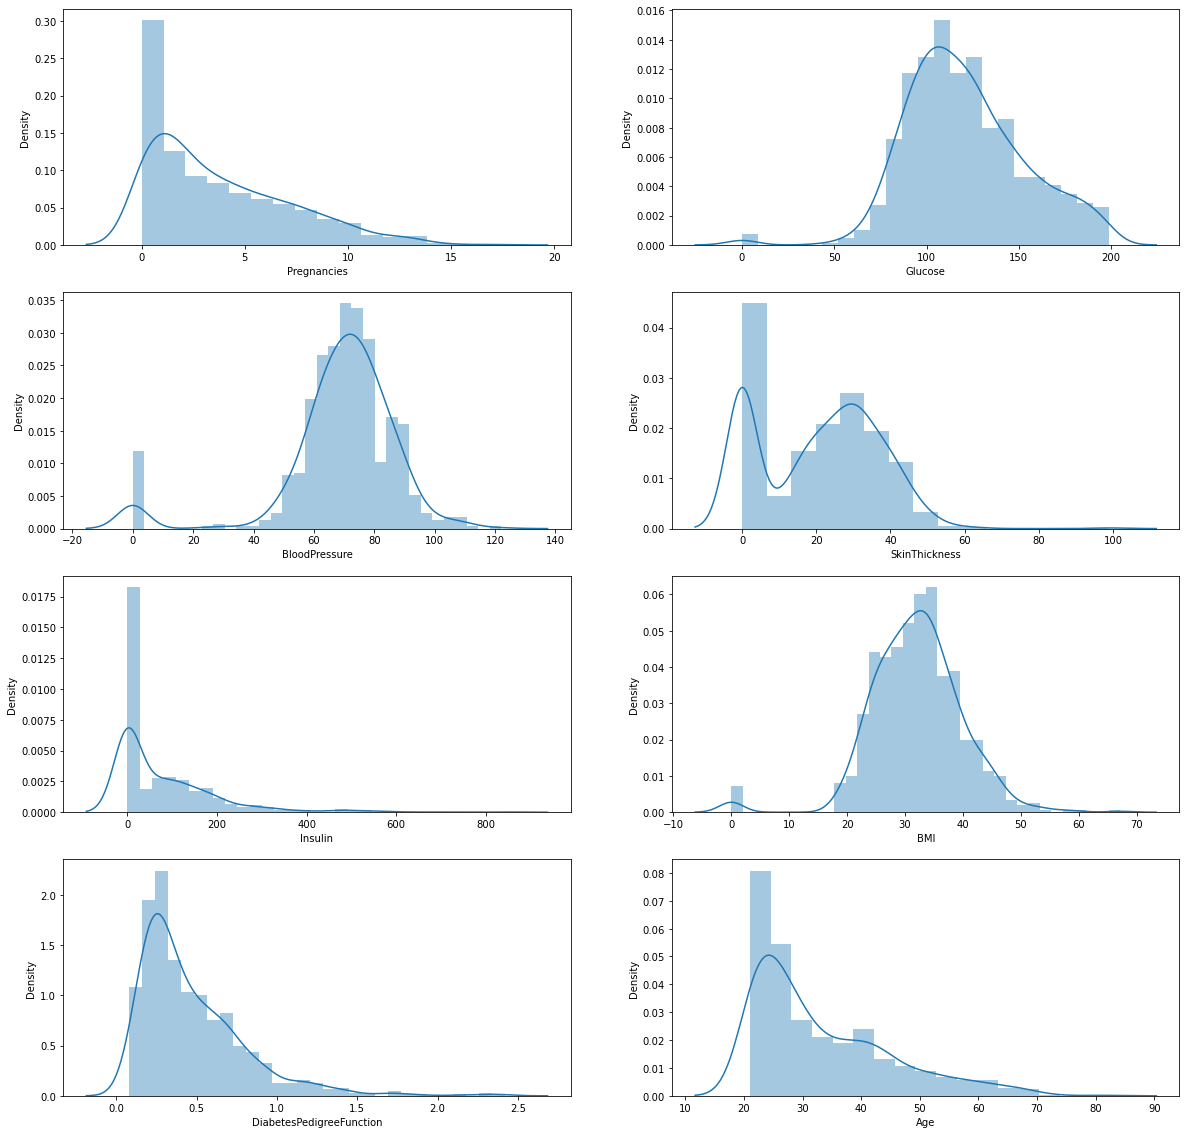

In [16]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(data.Pregnancies, ax=axes[0,0])
sns.distplot(data.Glucose, ax=axes[0,1])
sns.distplot(data.BloodPressure, ax=axes[1,0])
sns.distplot(data.SkinThickness, ax=axes[1,1])
sns.distplot(data.Insulin, ax=axes[2,0])
sns.distplot(data.BMI, ax=axes[2,1])
sns.distplot(data.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(data.Age, ax=axes[3,1])

Skin Thickness, Insulin, Blood Pressure, Glucose and BMI had no NaNs but some of the data was encoded as 0s.
This data was replaced using the median value.

In [17]:
data.Age.replace(0,data.Age.median() , inplace = True)

In [18]:
data.SkinThickness.replace(0, data.SkinThickness.median(), inplace=True)
data.Insulin.replace(0, data.Insulin.median(), inplace=True)
data.Glucose.replace(0, data.Glucose.median(), inplace=True)
data.BloodPressure.replace(0, data.BloodPressure.median(), inplace=True)
data.BMI.replace(0, data.BMI.median(), inplace=True)

Preparing Data
Split the data into a training set, dev set and test set.

In [19]:
x = data.iloc[:,:7]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,30.5,33.6,0.627
1,1,85,66,29,30.5,26.6,0.351
2,8,183,64,23,30.5,23.3,0.672
3,1,89,66,23,94.0,28.1,0.167
4,0,137,40,35,168.0,43.1,2.288
...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171
764,2,122,70,27,30.5,36.8,0.340
765,5,121,72,23,112.0,26.2,0.245
766,1,126,60,23,30.5,30.1,0.349


In [20]:
y= data.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain ,ytest = train_test_split(x,y, test_size=.25 , random_state=0)


In [22]:
#pip install tensorflow

In [23]:
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import Dropout,Flatten
from keras.utils import np_utils

In [49]:
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten
model = Sequential()
model.add(Dense(32,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(156,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(196,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(220,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [50]:
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                256       
                                                                 
 activation_26 (Activation)  (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 activation_27 (Activation)  (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 activation_28 (Activation)  (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 128)              

In [51]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(xtrain, ytrain, batch_size=10, epochs=100, verbose=1, validation_data=(xtest, ytest))
loss, accuracy = model.evaluate(xtest,ytest, verbose=0)


Epoch 1/100
58/58 [==============================] - 4s 33ms/step - loss: 0.7632 - accuracy: 0.6302 - val_loss: 0.6189 - val_accuracy: 0.6667
Epoch 2/100
58/58 [==============================] - 1s 11ms/step - loss: 0.6231 - accuracy: 0.6771 - val_loss: 0.5869 - val_accuracy: 0.6979
Epoch 3/100
58/58 [==============================] - 1s 11ms/step - loss: 0.6019 - accuracy: 0.6823 - val_loss: 0.6013 - val_accuracy: 0.6250
Epoch 4/100
58/58 [==============================] - 1s 13ms/step - loss: 0.5988 - accuracy: 0.6979 - val_loss: 0.5835 - val_accuracy: 0.6823
Epoch 5/100
58/58 [==============================] - 1s 13ms/step - loss: 0.5941 - accuracy: 0.6892 - val_loss: 0.6120 - val_accuracy: 0.6510
Epoch 6/100
58/58 [==============================] - 1s 10ms/step - loss: 0.5892 - accuracy: 0.6875 - val_loss: 0.5746 - val_accuracy: 0.7240
Epoch 7/100
58/58 [==============================] - 1s 12ms/step - loss: 0.5850 - accuracy: 0.6892 - val_loss: 0.5928 - val_accuracy: 0.6771
Epoch 

In [52]:
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Loss : 0.5753040909767151
Accuracy :70.3125
